In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('babies.csv')
df

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


In [4]:
smoking_and_birthwt = df[['smoke','bwt']]

In [5]:
smoking_and_birthwt

,smoke,bwt
0,0.0,120
1,0.0,113
2,1.0,128
3,0.0,123
4,1.0,108
...,...,...
1231,0.0,113
1232,0.0,128
1233,1.0,130
1234,0.0,125


In [6]:
print(smoking_and_birthwt['smoke'].isna().sum())

10


In [7]:
smoking_and_birthwt = smoking_and_birthwt.dropna()

In [8]:
smoking_and_birthwt

,smoke,bwt
0,0.0,120
1,0.0,113
2,1.0,128
3,0.0,123
4,1.0,108
...,...,...
1231,0.0,113
1232,0.0,128
1233,1.0,130
1234,0.0,125


In [9]:
smoker = smoking_and_birthwt['bwt'][smoking_and_birthwt['smoke']==1]
smoker

2       128
4       108
9       143
11      144
12      141
       ... 
1224    143
1225    113
1226    109
1227    103
1233    130
Name: bwt, Length: 484, dtype: int64

In [10]:
non_smoker = smoking_and_birthwt['bwt'][smoking_and_birthwt['smoke']==0]
non_smoker

0       120
1       113
3       123
5       136
6       138
       ... 
1230    132
1231    113
1232    128
1234    125
1235    117
Name: bwt, Length: 742, dtype: int64

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

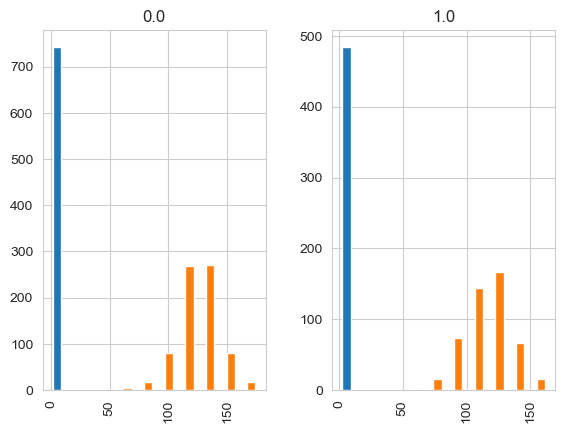

In [11]:
smoking_and_birthwt.hist(by='smoke')

<Axes: >

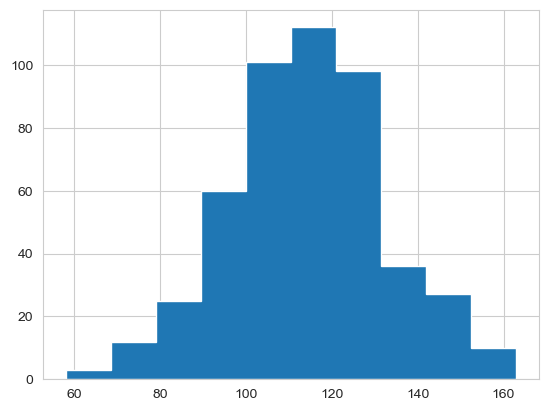

In [12]:
smoker.hist(histtype = 'stepfilled')

<Axes: >

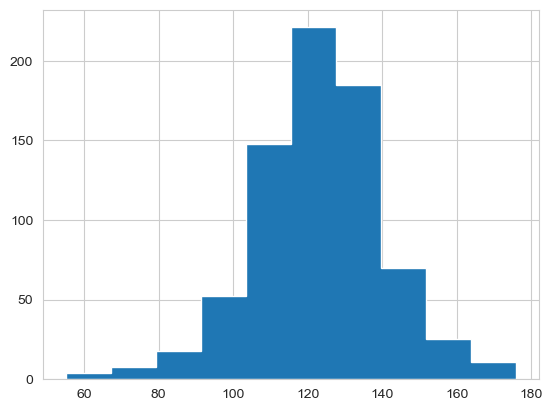

In [13]:
non_smoker.hist(histtype = 'stepfilled')

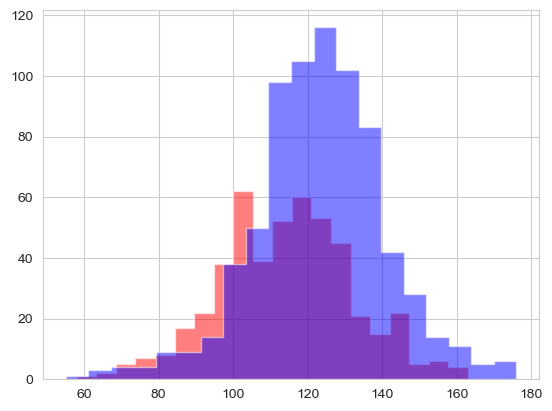

In [14]:
smoker.hist(histtype = 'stepfilled',alpha = 0.5,bins=20,color='red')
non_smoker.hist(histtype = 'stepfilled',alpha = 0.5,bins=20,color='blue')
plt.show()

In [26]:
mean_smoker = smoker.mean()
mean_smoker

114.10950413223141

In [27]:
mean_non_smoker = non_smoker.mean()
mean_non_smoker

123.04716981132076

 test stastistic is the difference between the mean weights of the smoker and the non-smoker 

In [28]:
diff_smoker_non_smoker = mean_smoker - mean_non_smoker
diff_smoker_non_smoker

-8.93766567908935

Null hypothesis : there is no difference between the weights of the new born baby of the smoker and the non-smoker
Alternative hypothesis: there is difference between the weights of the new born baby non-smoker and the smoker 

In [30]:
means_table = smoking_and_birthwt.groupby('smoke').mean()
means_table

,bwt
smoke,
0.0,123.047170
1.0,114.109504


## Random permutation method

In [71]:
difference_arr = np.zeros(5000)

In [72]:
for i in range(5000):
    shuffled = smoking_and_birthwt.sample(1226)
    shuffled_weights = shuffled['bwt']
    original_and_shuffled = smoking_and_birthwt.assign(shuffled_weights = shuffled_weights.values)
    all_group_means = original_and_shuffled.groupby('smoke').mean()
    diff = all_group_means['shuffled_weights'][1] - all_group_means['shuffled_weights'][0]
    difference_arr[i] = diff

In [75]:
difference_arr

array([-1.33166448, -0.27337885, -1.43066539, ..., -0.19144706,
        0.51862846,  0.85318327])

In [80]:
difference_df = pd.DataFrame(difference_arr)
difference_df

,0
0,-1.331664
1,-0.273379
2,-1.430665
3,-0.164136
4,1.368671
...,...
4995,-0.556726
4996,-1.102938
4997,-0.191447
4998,0.518628


array([[<Axes: title={'center': '0'}>]], dtype=object)

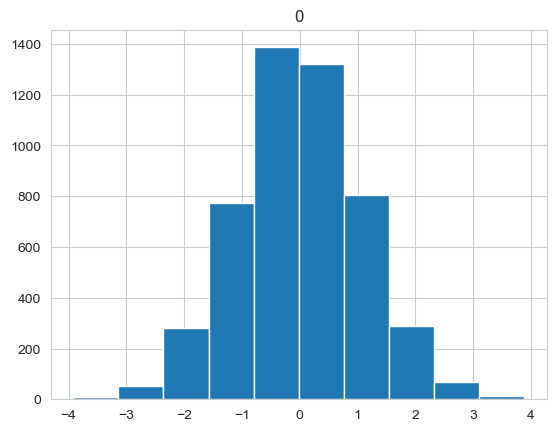

In [77]:
difference_df.hist()

As we can see the data pt is nowhere near the range of values of the differences histogram. Hence we can reject the null hypothesis 